# Credit Card Fraud Detection

# Problem Statement:

### The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

## Observations

### The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. 
### This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.
### The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. 
### Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.
### The ‘Time’ and ‘Amount’ features are not transformed data.
###  There is no missing value in the dataset.

## Inferences drawn:

### Owing to such imbalance in data, an algorithm that does not do any feature analysis and predicts all the transactions as non-frauds will also achieve an accuracy of 99.828%. Therefore, accuracy is not a correct measure of efficiency in our case. We need some other standard of correctness while classifying transactions as fraud or non-fraud.
### The ‘Time’ feature does not indicate the actual time of the transaction and is more of a list of the data in chronological order. So we assume that the ‘Time’ feature has little or no significance in classifying a fraud transaction. Therefore, we eliminate this column from further analysis.

# Incorrect Measures of Efficiency of a Data Model:

### Let’s look at the various measures of efficiency that fail at analyzing the correctness of the underlying data model.

### Total/Net Accuracy: One approach to gauge the compute model’s correctness is to use Accuracy as the deciding parameter. But, as stated earlier, in a highly skewed data set like this, we know that even if we predict all values as non-fraudulent, we’ll have only 492 wrong predictions out of 284,807 in total. So, the accuracy is excellent, but it still doesn’t solve our problem as we want to identify as many fraud cases as possible. So, we can’t use accuracy as a deciding factor here.

### Confusion Matrix: Merely tabulating the confusion matrix will not provide a clear understanding of the performance of the data. This is because the total number of fraud cases is much less, and variation in the confusion matrix will be so small that it will be equivalent to a justified error in a balanced dataset (probably even less!). So, this measure is also ruled out.

## Library import

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, accuracy_score, classification_report

In [59]:
from imblearn.pipeline import make_pipeline as imbalaced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

In [60]:
import warnings 
warnings.filterwarnings("ignore")

## Import Data

In [61]:
data = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Credit Card\creditcard.csv")

In [62]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Null Value Check

In [64]:
data.isnull().sum().max()

0

In [65]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Fraud Class

In [66]:
fraud_cases = data['Class'].value_counts()[0]
fraud

284315

## Non Fraud Class

In [67]:
non_fraud_cases =  data['Class'].value_counts()[1]
non_fraud_cases

492

## % of both classes

In [68]:
print('% of No_Fraud', round(data['Class'].value_counts()[0] / len(data) * 100,2))
print('% of No_Fraud', round(data['Class'].value_counts()[1] / len(data) * 100,2))

% of No_Fraud 99.83
% of No_Fraud 0.17


## Countplot

Text(0.5, 1.0, 'Class Distribution')

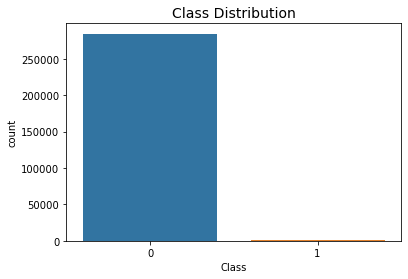

In [69]:
sns.countplot('Class', data = data)
plt.title('Class Distribution', fontsize=14)

In [70]:
# non_fraud = 0, fraud = 1
# imbalanced dataset - overfitting 
# we need model to consider both cases equally and model should be able to detect signs of fraud 

## Preprocessing

In [71]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scalar = StandardScaler()
rob_scalar = RobustScaler() # less prone to outliers

data['scaled_amount'] = rob_scalar.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scalar.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Amount', 'Time'], axis = 1, inplace = True)

## new variable for scaled amount and time

In [72]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)

data.insert(0, 'scaled_amount', scaled_amount)  # Eliminated with scaled amount
data.insert(1, 'scaled_time', scaled_time)      # Eliminated with scaled time

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Random under sampling

In [73]:
# Random under sampling - risk to non accurate performace due to trade and information loss
# before 28314 now 492 of non fraud
# removing data to have more balanced data and avoiding overfitting

data = data.sample(frac=1)

fraud_data = data.loc[data['Class']==1]
non_fraud_data = data.loc[data['Class']==0][:492]      # 492 are fraud cases 50 - 50 ration by 492

normal_distributed_data = pd.concat([fraud_data, non_fraud_data]) # skewed to normal

new_data = normal_distributed_data.sample(frac = 1, random_state = 42) # shuffle to retain accuracy 

new_data.head() # contain equal amount of both classes

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
707,0.041920,-0.988710,-1.393265,-1.095569,2.607795,-2.529060,-0.135265,-0.373239,0.221446,-0.962847,...,-0.229820,-0.281365,0.563218,-0.129765,0.089264,0.317551,-0.288551,-0.863521,-0.519168,0
254395,-0.201355,0.846086,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,...,-0.206239,0.242560,0.841230,-0.370157,-0.026012,0.491954,0.234576,-0.279788,-0.331933,1
218054,0.111786,0.663307,-2.034328,-1.285472,1.857375,0.800984,3.091875,1.584380,-0.289646,0.107165,...,-0.151415,-0.530614,-0.810371,-0.377722,-1.004536,0.017659,-0.776990,-0.566835,-0.318421,0
10801,-0.293440,-0.778827,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1
44270,-0.293440,-0.503084,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,...,0.396655,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1


## Equally distributed classes

Distribution of classses in subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


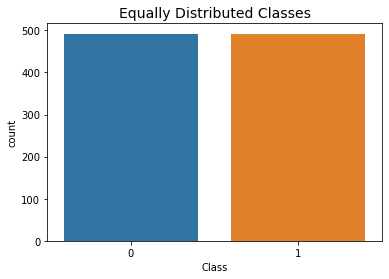

In [74]:
print('Distribution of classses in subsample dataset')
print(new_data['Class'].value_counts() / len(new_data))

sns.countplot('Class', data = new_data)
plt.title('Equally Distributed Classes', fontsize = 14)
plt.show()

## Target Variable

In [75]:
X = new_data.drop('Class', axis = 1)
y = new_data['Class']

## Splitting

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [77]:
# array for all test and train values
X_train.values
X_test.values
y_train.values
y_test.values

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

## Algorithm and Functions

In [83]:
# Dictionary key = "name of algorithm", value = name of functions
classifiers = { 
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

## Cross validation Score

In [85]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print("Classifiers: ",  key, "Has training score of", round(training_score.mean(), 2) * 100)

Classifiers:  LogisticRegression Has training score of 94.0
Classifiers:  KNearest Has training score of 93.0
Classifiers:  Support Vector Classifier Has training score of 92.0
Classifiers:  DecisionTreeClassifier Has training score of 90.0


In [102]:
# cross validation
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SVM = SVC()
Tree = DecisionTreeClassifier()

algorithms = [LR, KNN, SVM, Tree]

scores = ['LinearRegression', 'KNN', 'Support Vector Machine', 'Tree']

#LR_score = cross_val_score(LR, X_train, y_train, cv=5)
#print("The LR cross validation score: ", round(LR_score.mean(). * 100, 2).astype(str) + '%')

for i in range(len(scores)):
    sc = cross_val_score(algorithms[i], X_train, y_train, cv = 5)
    print("The {0} cross validation score: {1}%".format(scores[i], round(sc.mean() * 100, 2)))

The LinearRegression cross validation score: 94.15%
The KNN cross validation score: 92.88%
The Support Vector Machine cross validation score: 92.37%
The Tree cross validation score: 90.09%


In [103]:
# ROC and AUC - performace measures for classification problems at various threshold settings
# roc - probability curve, auc - degree or measure of separability
# how much model is capable of distinguishing between two classes
# high AUc = model is accurate

## ROC curve predictions

In [104]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

LR_pred = cross_val_predict(LR, X_train, y_train, cv=5, method="decision_function")

KNN_pred = cross_val_predict(KNN, X_train, y_train, cv=5)

SVM_pred = cross_val_predict(LR, X_train, y_train, cv=5, method="decision_function")

Tree_pred = cross_val_predict(LR, X_train, y_train, cv=5)

## ROC Score

In [105]:
print('LR ROC Score: ', roc_auc_score(y_train, LR_pred))
print('KNN ROC Score: ', roc_auc_score(y_train, KNN_pred))
print('SVM ROC Score: ', roc_auc_score(y_train, SVM_pred))
print('Tree ROC Score: ', roc_auc_score(y_train, Tree_pred))

LR ROC Score:  0.9768728588972917
KNN ROC Score:  0.9278165600155129
SVM ROC Score:  0.9768728588972917
Tree ROC Score:  0.9407569000064636


In [ ]:
# SVM Algorithm
# Objective - to divide a hyper plane in n dimensional space, n = number of features in dataset and it classifies
# the data points
#Obj - to find hyperplane with maximum margine i.e maximum distance between both classes